<a href="https://colab.research.google.com/github/jackthapakron/homework/blob/main/Tool_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
col = ["pregnant","Plasma_glucose","blood_pressure","skin_thickness","insulin","BMI","DiabetesPedigreeFunction","Age","outcome"]

In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/dataset_for_project/pima_indians_Homework/pima-indians-diabetes.csv',header=None, names=col)

In [3]:
data.head()

,pregnant,Plasma_glucose,blood_pressure,skin_thickness,insulin,BMI,DiabetesPedigreeFunction,Age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
cols = ['pregnant', 'Plasma_glucose', 'blood_pressure', 'skin_thickness',
       'insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = data[cols]
y = data['outcome']
test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=test_size,
                                                    stratify=y,
                                                    random_state=1)

##1.Stat Feature Selection

###Stat feature for Regression

In [38]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# define feature selection
fs = SelectKBest(score_func=f_regression, k=4)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(768, 4)


###Stat Feature for Classifiation

In [ ]:
#Number of feature is 4

In [ ]:
#Number

In [15]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# define feature selection
fs = SelectKBest(score_func=f_classif, k=4)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(768, 4)


In [50]:
X_selected.shape[1]

4

In [21]:
X.columns[fs.get_support()]

Index(['pregnant', 'Plasma_glucose', 'BMI', 'Age'], dtype='object')

##2.RFE

###RFE For classifiation

In [4]:
#RFE

In [5]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import numpy as np


In [6]:
data.columns

Index(['pregnant', 'Plasma_glucose', 'blood_pressure', 'skin_thickness',
       'insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'outcome'],
      dtype='object')

In [40]:

# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.704 (0.055)


In [41]:
rfe.fit(X_train,y_train)
print("Ranking is ",rfe.ranking_)

Ranking is  [3 1 1 2 4 1 1 1]


In [26]:
 print("Number of columns is",rfe.n_features_)

Number of columns is 4


In [10]:
np.array(cols)[rfe.support_]

array(['Plasma_glucose', 'insulin', 'BMI', 'DiabetesPedigreeFunction',
       'Age'], dtype='<U24')

###RFE For Regression

In [30]:
# evaluate RFE for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


MAE: -0.301 (0.056)


##3.Permutation feature important

###Permutation feature important for regression

Feature: 0, Score: 0.00002
Feature: 1, Score: 0.11207
Feature: 2, Score: 0.01925
Feature: 3, Score: 0.01333
Feature: 4, Score: 0.05562
Feature: 5, Score: 0.00366
Feature: 6, Score: 0.00003
Feature: 7, Score: 0.01924


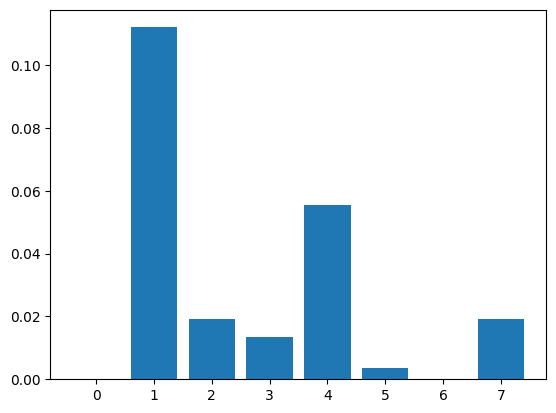

In [31]:
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

###Permutation feature important for Classfication

Feature: 0, Score: -0.00078
Feature: 1, Score: 0.15260
Feature: 2, Score: 0.02344
Feature: 3, Score: 0.01927
Feature: 4, Score: 0.07005
Feature: 5, Score: 0.00599
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.04089


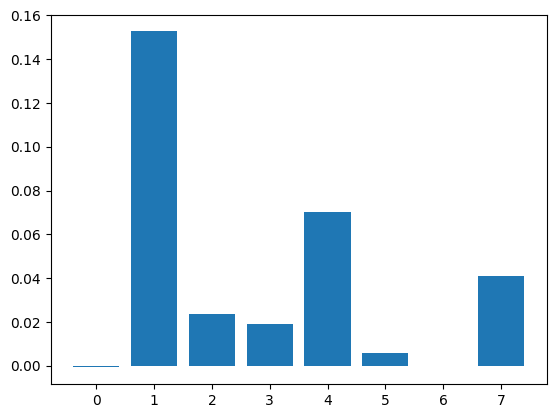

In [36]:
# permutation feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

##4.Comparsion in model developing by using all features vs (1) vs (2) vs (3)

###Number of features

In [51]:
#Stat feature selection
print(f'Number of features selected by SelectKBest: {X_selected.shape[1]}')

Number of features selected by SelectKBest: 4


In [44]:
#RFE
print(f'Number of features selected by RFE: {rfe.n_features_to_select}')

Number of features selected by RFE: 5


In [52]:
#Permutation feature important
print(f'Number of features selected by Permutation Feature Importance: {len(importance)}')

Number of features selected by Permutation Feature Importance: 8


###selected feature

In [55]:
#stat feature selection
selected_columns = X.columns[fs.get_support()]
print("Selected Columns:", selected_columns)

Selected Columns: Index(['pregnant', 'Plasma_glucose', 'BMI', 'Age'], dtype='object')


In [58]:
#RFE
print("Selected columns",np.array(cols)[rfe.support_])

Selected columns ['Plasma_glucose' 'blood_pressure' 'BMI' 'DiabetesPedigreeFunction' 'Age']
